In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import matplotlib
import os
import matplotlib.ticker as ticker
import math
from scipy.fftpack import *
from pactools import Comodulogram, REFERENCES
from pactools import simulate_pac

ModuleNotFoundError: No module named 'pactools'

In [3]:
root = "/Users/andreu/Desktop/Dropbox/transfer_inormation_prague/"
dir = "TE_electrodes"
name = "/rossler_wavelets-r12e27N03.dat"
rosslerData = np.loadtxt(root+dir+name, dtype= float)

In [6]:
def hilbert_from_scratch(u):
    # N : fft length
    # M : number of elements to zero out
    # U : DFT of u
    # v : IDFT of H(U)

    N = len(u)
    # take forward Fourier transform
    U = fft(u)
    M = N - N//2 - 1
    # zero out negative frequency components
    U[N//2+1:] = [0] * M
    # double fft energy except @ DC0
    U[1:N//2] = 2 * U[1:N//2]
    # take inverse Fourier transform
    v = ifft(U)
    return v

In [7]:
if __name__ == '__main__':
    N = 32#length(rosslerData)
    f = 1
    dt = 1.0 / N
    y = []
    for n in range(N):
        x = 2*math.pi*f*dt*n
        y.append(math.sin(x))
    z1 = hilbert_from_scratch(y)
    z2 = hilbert(y)
    print(" n     y fromscratch scipy")
    for n in range(N):
        print('{:2d} {:+5.2f} {:+10.2f} {:+5.2f}'.format(n, y[n], z1[n], z2[n]))

 n     y fromscratch scipy
 0 +0.00 +0.00-1.00j +1.00
 1 +0.20 +0.20-0.98j +0.98
 2 +0.38 +0.38-0.92j +0.92
 3 +0.56 +0.56-0.83j +0.83
 4 +0.71 +0.71-0.71j +0.71
 5 +0.83 +0.83-0.56j +0.56
 6 +0.92 +0.92-0.38j +0.38
 7 +0.98 +0.98-0.20j +0.20
 8 +1.00 +1.00-0.00j +0.00
 9 +0.98 +0.98+0.20j -0.20
10 +0.92 +0.92+0.38j -0.38
11 +0.83 +0.83+0.56j -0.56
12 +0.71 +0.71+0.71j -0.71
13 +0.56 +0.56+0.83j -0.83
14 +0.38 +0.38+0.92j -0.92
15 +0.20 +0.20+0.98j -0.98
16 +0.00 +0.00+1.00j -1.00
17 -0.20 -0.20+0.98j -0.98
18 -0.38 -0.38+0.92j -0.92
19 -0.56 -0.56+0.83j -0.83
20 -0.71 -0.71+0.71j -0.71
21 -0.83 -0.83+0.56j -0.56
22 -0.92 -0.92+0.38j -0.38
23 -0.98 -0.98+0.20j -0.20
24 -1.00 -1.00+0.00j -0.00
25 -0.98 -0.98-0.20j +0.20
26 -0.92 -0.92-0.38j +0.38
27 -0.83 -0.83-0.56j +0.56
28 -0.71 -0.71-0.71j +0.71
29 -0.56 -0.56-0.83j +0.83
30 -0.38 -0.38-0.92j +0.92
31 -0.20 -0.20-0.98j +0.98


In [18]:
if __name__ == '__main__':
    N = len(rosslerData)
    f = 1
    dt = 1.0 / N
    
    ht = hilbert(rosslerData)
    

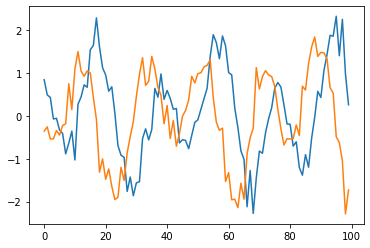

In [20]:
plt.plot(rosslerData[0:100])
plt.plot(ht[0:100])